# **Big Data Analytics**

# **Initiate and Configure Spark**


In [ ]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=5046de55dba2de19c5954ac6289b70d1d7daace1686fa2b64e81e81fd176074c
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init()


In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Dataset').getOrCreate()



# **Load Data**

In [ ]:
dataset1 = spark.read.load("02-14-2018.csv", format="csv", inferSchema=True, header=True)
dataset2 = spark.read.load("02-15-2018.csv", format="csv", inferSchema=True, header=True)
dataset3 = spark.read.load("02-16-2018.csv", format="csv", inferSchema=True, header=True)
dataset4 = spark.read.load("02-21-2018.csv", format="csv", inferSchema=True, header=True)
dataset5 = spark.read.load("02-22-2018.csv", format="csv", inferSchema=True, header=True)
dataset6 = spark.read.load("02-23-2018.csv", format="csv", inferSchema=True, header=True)
dataset7 = spark.read.load("02-28-2018.csv", format="csv", inferSchema=True, header=True)
dataset8 = spark.read.load("03-01-2018.csv", format="csv", inferSchema=True, header=True)
dataset9 = spark.read.load("03-02-2018.csv", format="csv", inferSchema=True, header=True)

In [ ]:
from functools import reduce
from pyspark.sql import DataFrame

In [ ]:
# Create a list of dataframes
dataset = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7, dataset2, dataset9]


In [ ]:
# merged  dataframe
DDOS = reduce(DataFrame.unionAll, dataset)

In [ ]:
# Print the dataset
DDOS.show()


+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-------------

In [ ]:
# The count the number of attacks per label
DDOS.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+------+
|               Label| count|
+--------------------+------+
|              Benign|176067|
|DoS attacks-SlowH...| 81284|
|      FTP-BruteForce| 71116|
|DoS attacks-Golde...| 66222|
|    DDOS attack-HOIC| 56599|
|                 Bot| 46086|
|DoS attacks-Slowl...| 13062|
|DDOS attack-LOIC-UDP|  1730|
|    Brute Force -Web|   611|
|    Brute Force -XSS|   230|
|       SQL Injection|    87|
|               Label|     2|
+--------------------+------+



In [ ]:
# Rename all column
Data = DDOS.withColumnRenamed("Tot Fwd Pkts","tot_fw_pk").withColumnRenamed("Idle Max","idl_max") \
.withColumnRenamed("dst port","dst_port").withColumnRenamed("Idle Min","idl_min") \
.withColumnRenamed("TotLen Fwd Pkts","tot_l_fw_pkt").withColumnRenamed("Flow Duration","fl_dur") \
.withColumnRenamed("Flow Byts/s","fl_byt_s").withColumnRenamed("Fwd PSH Flags","fw_psh_flag") \
.withColumnRenamed("Active Max","atv_max").withColumnRenamed("Active Min","atv_min") \
.withColumnRenamed("Pkt Size Avg","pkt_size_avg").withColumnRenamed("Fwd Seg Size Avg","fw_seg_avg") \
.withColumnRenamed("Bwd Seg Size Avg","bw_seg_avg")

In [ ]:
Data.createOrReplaceTempView("IDS")

# **TASK#1 SPARK SQL**

In [ ]:
#Student#1
# Query 1 [Briefly explain]: A set of objects is returned that has duplicate elements removed and is utilised for collecting. 

DF=spark.sql("SELECT Protocol, collect_set(fl_byt_s) as FlowByts FROM IDS WHERE Protocol IS NOT NULL GROUP BY Protocol  ")
DF.show()

+--------+--------------------+
|Protocol|            FlowByts|
+--------+--------------------+
|       6|[0.0, 95862.06897...|
|      17|[173387.0968, 211...|
|       0|               [0.0]|
+--------+--------------------+



In [ ]:
#Student#1
#Query 2 [Briefly explain]: A set of objects is returned and group by with the descindind order.
DF = spark.sql("""SELECT protocol, count(*) as ActiveMax FROM IDS GROUP BY protocol  ORDER BY 2 DESC""")
DF.show()


+--------+---------+
|protocol|ActiveMax|
+--------+---------+
|       6|   455270|
|      17|    53726|
|       0|     4098|
|    null|        2|
+--------+---------+



<AxesSubplot:xlabel='protocol'>

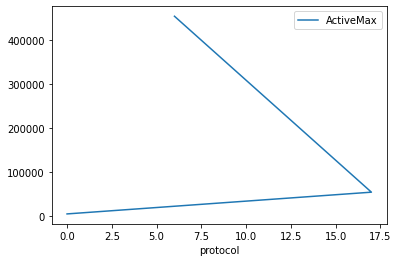

In [ ]:
#Student#1 
#Plot a graph 
pandas_df=DF.toPandas()
pandas_df.sort_values(by='ActiveMax',ascending=False).plot(x='protocol',y='ActiveMax')

In [ ]:
#Student:2
#Query 1 [Briefly explain]: Select the object and return the specific group 

DF=spark.sql("""SELECT Timestamp, dst_port ,Protocol, tot_l_fw_pkt FROM IDS WHERE dst_port > 80 AND protocol = '6' AND tot_l_fw_pkt  = '5' 
ORDER by dst_port DESC""")
DF.show(10)

+-------------------+--------+--------+------------+
|          Timestamp|dst_port|Protocol|tot_l_fw_pkt|
+-------------------+--------+--------+------------+
|22/02/2018 12:36:18|     443|       6|           5|
|22/02/2018 09:30:12|     443|       6|           5|
|22/02/2018 12:34:30|     443|       6|           5|
|22/02/2018 12:34:30|     443|       6|           5|
|23/02/2018 03:13:58|     443|       6|           5|
|23/02/2018 03:15:58|     443|       6|           5|
|28/02/2018 10:51:18|     443|       6|           5|
+-------------------+--------+--------+------------+



In [ ]:
#Student:2
#Query 2 [Briefly explain]: Select the  object and return the specific group with their range
DF=spark.sql("""SELECT dst_port, protocol, fl_dur, idl_max  FROM IDS WHERE fl_dur < 1000 AND idl_max < 5
ORDER BY fl_dur DESC""")
DF.show(10)

+--------+--------+------+-------+
|dst_port|protocol|fl_dur|idl_max|
+--------+--------+------+-------+
|      53|      17|   999|    0.0|
|      53|      17|   999|    0.0|
|      53|      17|   999|    0.0|
|      80|       6|   999|    0.0|
|      80|       6|   999|    0.0|
|      53|      17|   999|    0.0|
|      53|      17|   999|    0.0|
|   34926|       6|   999|    0.0|
|      80|       6|   999|    0.0|
|      53|      17|   999|    0.0|
+--------+--------+------+-------+
only showing top 10 rows



<AxesSubplot:xlabel='protocol', ylabel='fl_dur'>

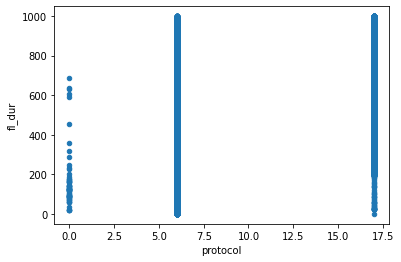

In [ ]:
#student 2
#Plot a graph 
pandas_df=DF.toPandas()
pandas_df.sort_values(by='dst_port',ascending=False).plot.scatter(x='protocol',y='fl_dur')

In [ ]:
#student 3
#Query 1 [Briefly explain]: Select the object with specifiv object
DF=spark.sql("""SELECT dst_port, protocol, Label  FROM IDS WHERE Label="DDOS attack-HOIC"
ORDER BY protocol""")
DF.show(10)


+--------+--------+----------------+
|dst_port|protocol|           Label|
+--------+--------+----------------+
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
|      80|       6|DDOS attack-HOIC|
+--------+--------+----------------+
only showing top 10 rows



In [ ]:
#Student 3
#Query 2 [Briefly explain]: Select the object and return the specific label name 
DF=spark.sql("""SELECT Timestamp, dst_port ,Label, tot_l_fw_pkt FROM IDS WHERE dst_port > 20 AND Label = 'SQL Injection' 
ORDER by dst_port DESC""")
DF.show(12)

+-------------------+--------+-------------+------------+
|          Timestamp|dst_port|        Label|tot_l_fw_pkt|
+-------------------+--------+-------------+------------+
|22/02/2018 04:14:30|      80|SQL Injection|        1295|
|22/02/2018 04:14:35|      80|SQL Injection|           0|
|22/02/2018 04:14:45|      80|SQL Injection|         603|
|22/02/2018 04:14:50|      80|SQL Injection|           0|
|22/02/2018 04:14:45|      80|SQL Injection|        3208|
|22/02/2018 04:14:58|      80|SQL Injection|           0|
|22/02/2018 04:16:30|      80|SQL Injection|         485|
|22/02/2018 04:16:49|      80|SQL Injection|         509|
|22/02/2018 04:16:54|      80|SQL Injection|           0|
|22/02/2018 04:16:55|      80|SQL Injection|         510|
|22/02/2018 04:17:00|      80|SQL Injection|           0|
|22/02/2018 04:17:30|      80|SQL Injection|         510|
+-------------------+--------+-------------+------------+
only showing top 12 rows



<AxesSubplot:>

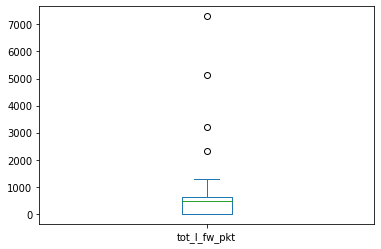

In [ ]:
#Student 3
#plot a graph
pandas_df=DF.toPandas()
pandas_df.sort_values(by='dst_port',ascending=False).plot.box(x='dst_port',y='tot_l_fw_pkt')

# **Task 2 - Part1: PySpark**

In [ ]:
#import library
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest

#create an object spark
#spark = SparkSession.builder.getOrCreate()

DDOS.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-------------

In [ ]:
# To get the Datatypes of the columns
DDOS.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: double (nullable = true)
 |-- Flow IAT Min: double (nullable = tr

In [ ]:
#We are converting required columns from string to float 
from pyspark.sql.functions import col
selected_features = ['tot_fw_pk','idl_max','atv_max','atv_min','idl_min','tot_l_fw_pkt','pkt_size_avg','fw_seg_avg','bw_seg_avg','Protocol']
features_df = Data.select(*(col(c).cast("float").alias(c) for c in selected_features))
features_df.show()

+---------+-----------+-------+-------+-----------+------------+------------+----------+----------+--------+
|tot_fw_pk|    idl_max|atv_max|atv_min|    idl_min|tot_l_fw_pkt|pkt_size_avg|fw_seg_avg|bw_seg_avg|Protocol|
+---------+-----------+-------+-------+-----------+------------+------------+----------+----------+--------+
|      3.0| 5.632096E7|    0.0|    0.0| 5.632076E7|         0.0|         0.0|       0.0|       0.0|     0.0|
|      3.0|5.6320816E7|    0.0|    0.0|5.6320652E7|         0.0|         0.0|       0.0|       0.0|     0.0|
|      3.0|5.6319524E7|    0.0|    0.0|5.6319096E7|         0.0|         0.0|       0.0|       0.0|     0.0|
|     15.0|        0.0|    0.0|    0.0|        0.0|      1239.0|      140.48|      82.6|     227.3|     6.0|
|     14.0|        0.0|    0.0|    0.0|        0.0|      1143.0|      134.08|  81.64286| 200.81818|     6.0|
|     16.0|        0.0|    0.0|    0.0|        0.0|      1239.0|   125.42857|   77.4375| 189.41667|     6.0|
|      3.0|5.632038

In [ ]:
#Student:1
#analytical methods:1  KernelDensity: A good method for displaying empirical probability distributions without making assumptions 
#about the specific distribution from which the observed samples are taken is kernel density estimation.
from pyspark.mllib.stat import KernelDensity
dat_rdd = features_df.select("idl_min").rdd
dat_rdd_data = dat_rdd.map(lambda x: x[0])

kd = KernelDensity()
kd.setSample(dat_rdd_data)
kd.estimate([13.0,14.0])


array([6.80858168e-38, 9.33428692e-44])

In [ ]:
#Analytical method 2: Finding the correlation between two columns in which one column's value increases the other column's value lowers.

features_df.stat.corr("bw_seg_avg","Protocol")


0.03350048759051893

In [ ]:
#Analytical method 3: calculating standard deviation of specific column
from pyspark.sql import functions as f
Data.agg(f.stddev("idl_min")).show()

+--------------------+
|stddev_samp(idl_min)|
+--------------------+
|1.6692951717036324E7|
+--------------------+



In [ ]:
#Student 2
# Analytical method 1: calculating mean of specific column
Data.agg(f.mean("pkt_size_avg")).show()

+-----------------+
|avg(pkt_size_avg)|
+-----------------+
|65.76810074626209|
+-----------------+



In [ ]:
# Analytical method 2: The asymmetry of a distribution is measured by skewness.
features_df.select(f.skewness(features_df['bw_seg_avg'])).show()


+--------------------+
|skewness(bw_seg_avg)|
+--------------------+
|   3.461879922425025|
+--------------------+



In [ ]:
# Analytical method 2: Kurtosis analyzes a distribution's tails' weight in comparison to a normal distribution.
df=features_df.select(f.kurtosis(features_df['tot_fw_pk']))
df.show()

+-------------------+
|kurtosis(tot_fw_pk)|
+-------------------+
|  362.8609427093643|
+-------------------+



In [ ]:
# Analytical method 3: Summary Statistics: All numeric columns are subjected to summary statistics calculations by the describe() method, 
#which then returns the results as a DataFrame.
(features_df.describe().select( 
                    "summary",
                    f.round("tot_fw_pk",5).alias("tot_fw_pk)"),
                    f.round("bw_seg_avg", 5).alias("bw_seg_avg"),
                    f.round("protocol", 5).alias("protocol"),
                    f.round("idl_max", 5).alias("idl_max"),
                    f.round("atv_max", 5).alias("atv_max"),
                    f.round("atv_min", 5).alias("atv_min"),
                    f.round("idl_min", 5).alias("idl_min"))
                    .show())


+-------+----------+----------+--------+----------------+------------+-------------+---------------+
|summary|tot_fw_pk)|bw_seg_avg|protocol|         idl_max|     atv_max|      atv_min|        idl_min|
+-------+----------+----------+--------+----------------+------------+-------------+---------------+
|  count|  513094.0|  513094.0|513094.0|        513094.0|    513094.0|     513094.0|       513094.0|
|   mean| 399.70935|  79.55169| 7.10389|   5014730.75512|284841.75499| 154817.80475|  4353129.00884|
| stddev|6997.85482| 141.70793|  3.4262|1.752889006541E7| 3107687.815|2012708.16338|1.66929517146E7|
|    min|       1.0|       0.0|     0.0|             0.0|         0.0|          0.0|            0.0|
|    max|  309629.0| 1955.9636|    17.0|    1.19947272E8|1.12206864E8| 1.12206864E8|   1.19947272E8|
+-------+----------+----------+--------+----------------+------------+-------------+---------------+



In [ ]:
#Student:3
# Analytical method 1: find the percentile of a 50th %

Data.groupby('label').agg(f.expr('percentile(protocol, array(0.80))')[0].alias('%50')).show()

+--------------------+----+
|               label| %50|
+--------------------+----+
|              Benign|17.0|
|      FTP-BruteForce| 6.0|
|DoS attacks-Golde...| 6.0|
|DoS attacks-Slowl...| 6.0|
|DoS attacks-SlowH...| 6.0|
|DDOS attack-LOIC-UDP|17.0|
|    DDOS attack-HOIC| 6.0|
|       SQL Injection| 6.0|
|    Brute Force -XSS| 6.0|
|    Brute Force -Web|17.0|
|               Label|null|
|                 Bot| 6.0|
+--------------------+----+



In [ ]:
# Analytical method 2:Simple cross tabulations of two (or more) elements can be computed using the crosstab() function.
features_df.stat.crosstab("idl_min", "protocol").show()

+----------------+---+----+---+----+
|idl_min_protocol|0.0|17.0|6.0|null|
+----------------+---+----+---+----+
|       6646364.0|  0|   0|  2|   0|
|       5458201.0|  0|   0|  1|   0|
|     2.0344392E7|  0|   0|  1|   0|
|       1.58678E7|  0|   0|  1|   0|
|     8.6348096E7|  0|   0|  1|   0|
|     2.9951412E7|  0|   0|  1|   0|
|     1.6072199E7|  0|   0|  2|   0|
|    1.05344768E8|  0|   0|  2|   0|
|     5.7983688E7|  0|   0|  1|   0|
|       5016525.0|  0|   0|  1|   0|
|     9.7386816E7|  0|   0|  2|   0|
|       7150222.0|  0|   0|  1|   0|
|     1.0003606E7|  0|   0|  1|   0|
|       9812163.0|  0|   0|  1|   0|
|       7200488.0|  0|   2|  0|   0|
|    1.07098664E8|  0|   0|  2|   0|
|       6998747.0|  0|   0|  2|   0|
|       5999904.0|  0|   0|  1|   0|
|       6764749.0|  0|   0|  2|   0|
|     3.0325022E7|  0|   0|  2|   0|
+----------------+---+----+---+----+
only showing top 20 rows



In [ ]:
# Analytical method 3: calculating mean of specific column
Data.agg(f.count("Protocol")).show()

+---------------+
|count(Protocol)|
+---------------+
|         513094|
+---------------+



In [ ]:
features_df.select('Protocol').summary().show()
    

+-------+------------------+
|summary|          Protocol|
+-------+------------------+
|  count|            513094|
|   mean| 7.103887396851259|
| stddev|3.4262041098082254|
|    min|               0.0|
|    25%|               6.0|
|    50%|               6.0|
|    75%|               6.0|
|    max|              17.0|
+-------+------------------+



<AxesSubplot:xlabel='idl_max', ylabel='idl_max'>

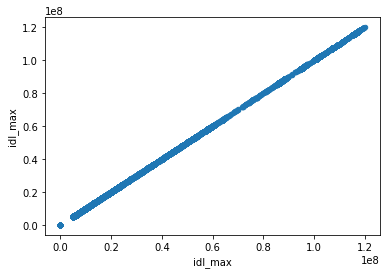

In [ ]:
#Plot a graph 
pandas_df=features_df.toPandas()
pandas_df.sort_values(by='Protocol',ascending=False).plot.scatter(x='idl_max',y='idl_max')

<AxesSubplot:>

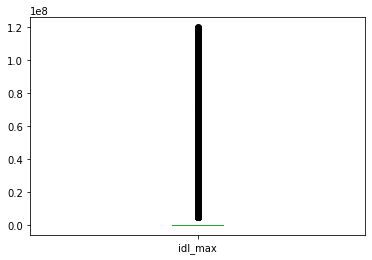

In [ ]:
#Plot a graph 
pandas_df=features_df.toPandas()
pandas_df.sort_values(by='Protocol',ascending=False).plot.box(x='bw_seg_avg',y='idl_max')

# **Build a Scalable Practical Machine Learning (ML)_Part2**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [ ]:
features_df.show()

+---------+-----------+-------+-------+-----------+------------+------------+----------+----------+--------+
|tot_fw_pk|    idl_max|atv_max|atv_min|    idl_min|tot_l_fw_pkt|pkt_size_avg|fw_seg_avg|bw_seg_avg|Protocol|
+---------+-----------+-------+-------+-----------+------------+------------+----------+----------+--------+
|      3.0| 5.632096E7|    0.0|    0.0| 5.632076E7|         0.0|         0.0|       0.0|       0.0|     0.0|
|      3.0|5.6320816E7|    0.0|    0.0|5.6320652E7|         0.0|         0.0|       0.0|       0.0|     0.0|
|      3.0|5.6319524E7|    0.0|    0.0|5.6319096E7|         0.0|         0.0|       0.0|       0.0|     0.0|
|     15.0|        0.0|    0.0|    0.0|        0.0|      1239.0|      140.48|      82.6|     227.3|     6.0|
|     14.0|        0.0|    0.0|    0.0|        0.0|      1143.0|      134.08|  81.64286| 200.81818|     6.0|
|     16.0|        0.0|    0.0|    0.0|        0.0|      1239.0|   125.42857|   77.4375| 189.41667|     6.0|
|      3.0|5.632038

In [ ]:
df1=features_df.toPandas()

In [ ]:
#Sum of all the NULL values
df1.isnull().sum()

tot_fw_pk       2
idl_max         2
atv_max         2
atv_min         2
idl_min         2
tot_l_fw_pkt    2
pkt_size_avg    2
fw_seg_avg      2
bw_seg_avg      2
Protocol        2
dtype: int64

In [ ]:
#Remove Null Values
df1=df1.fillna('0')

In [ ]:
df1.isnull().sum()

tot_fw_pk       0
idl_max         0
atv_max         0
atv_min         0
idl_min         0
tot_l_fw_pkt    0
pkt_size_avg    0
fw_seg_avg      0
bw_seg_avg      0
Protocol        0
dtype: int64

<AxesSubplot:>

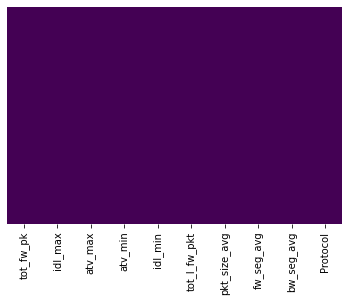

In [ ]:
# Heatmap to check missing values 
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Protocol', ylabel='Count'>

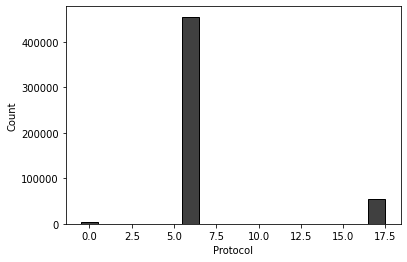

In [ ]:
#Vistualization
sns.histplot(data=df1['Protocol'],color='black')

In [ ]:
#df1["dst_port"] = df1['dst_port'].str.replace('NA','0').astype(float)

KeyError: ignored

In [ ]:
#Train-Test Split
# specify input and output attributes
X = df1.drop(columns=['Protocol'], axis=1).astype('float')
y = df1['Protocol'].astype('float')


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [ ]:
#Student1:
#ML Model Technique: LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

In [ ]:
#Student2:
#ML Model Technique: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

In [ ]:
#Student3:
#ML ModeL Technique: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

In [ ]:
modelrm = RandomForestClassifier()
modelrm.fit(x_train, y_train)

In [ ]:
y_pred=modelrm.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",modelrm.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

In [ ]:
ypred = modelrm.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Convert ipynb to HTML for Turnitin submission**

In [ ]:
# install nbconvert
!pip install nbconvert 

In [ ]:
# convert ipynb to html
# file name: Name.ipynb

#!jupyter nbconvert --to html Name.ipynb